# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [2]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

In [33]:
%run smartcab\agent.py
#可以观察到可视化程序的各部分的功能

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**
代理程序获得了从-5到+2一系列不同大小的奖励。模拟程序中出租车一直没有移动，但由于其所处的环境状态在每一步发生变化，所以每一个step中相当于代理程序都采取了no action，所以在交通灯变红时，代理程序会获得正数奖励，而变绿时奖励为负，但也存在极少数绿灯时奖励为一个很小的正值。

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**
-  1. epsilon：如果设定为0.5，那么程序就会以0.5的概率选择一个随机的动作而不是通过Q-learning学习到的最佳动作。所以设定不同的值会影响程序对未知策略的探索程度。
  2. update_delay：设定每次刷新的时间间隔。
  3. alpha：为学习速率（learning rate），该参数在新计算出的Q值中调和了迭代计算中上一次的Q值，若设定为0.5则新计算的Q值中有一半是旧值，旧值占的比重越大则学习速度越慢（学习速率越小越细致吗？），旧值占比越小学习越快。
- `'act'`
- `'render_text()'`是在终端的文本性的输出，非图形界面；`'render()'`是在图形界面窗口渲染出小车在模拟路况上的动作状态。
- 东西方向

### Note
1. 问题2-1被卡住

    原因：某些flag项忘记了其概念定义，导致不理解。 
    
    解决：搜索了q-learning中的学习率α；巩固了对ε-greedy的理解。

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### Note
#### random.choice
　　random.choice从序列中获取一个随机元素。其函数原型为：random.choice(sequence)。参数sequence表示一个有序类型。这里要说明 一下：sequence在python不是一种特定的类型，而是泛指一系列的类型。list, tuple, 字符串都属于sequence。有关sequence可以查看python手册数据模型这一章。下面是使用choice的一些例子：
```
print random.choice("学习Python")   
print random.choice(["JGood", "is", "a", "handsome", "boy"])  
print random.choice(("Tuple", "List", "Dict"))  
```

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

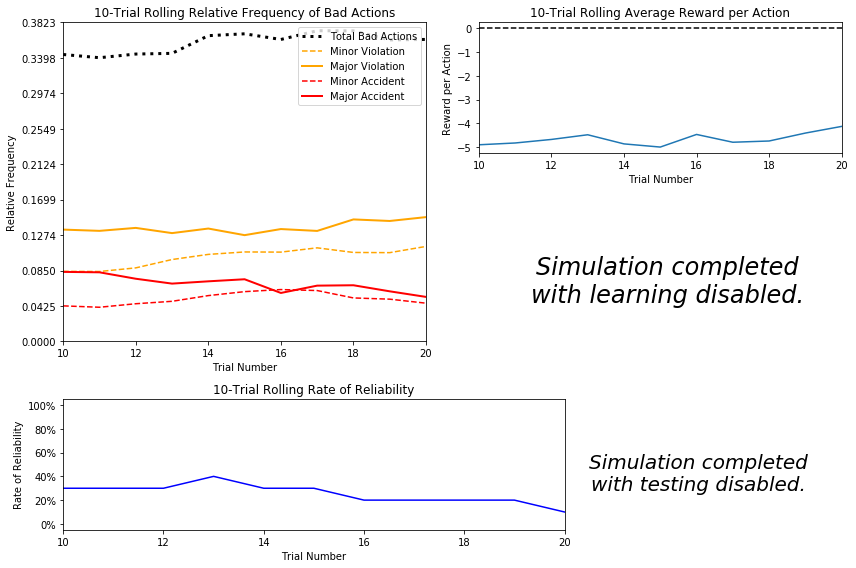

In [13]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**
- 代理程序做不良决策的频率大约在34%-37%之间，大约1/3的不良决策造成了事故（包括轻微和严重事故）；
- 合理，从可靠性率图可以看出，可靠率很低，平均约为30％。因为模型是随机的，它没有经过任何训练。它也为一个模型设定了一个最低基准，即任何训练过的模型都应该比随机模型可靠率更高。
- 对于导致事故和违规的行动，代理程序会获得负数奖励，安全合理的行动会获得正数奖励。因为这个模型是一个随机模型，可以从可视化的结果中看到几乎每次行动奖励均为负数，表明这种这些随机的不合理的行动受到了严重惩罚。
- 没有，因为行动始终是随机产生的而没有参考训练经验，因此输出结果没有变得越来越好而是始终与随机行动的好坏一致。
- 不会，安全性可靠性都极低，行动也是随机的不合理的。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**
- 与安全性相关性最高的是'light'交通灯颜色，因为闯红灯是最容易导致意外的因素；其次是'left''right''oncoming'三个方向来车的情况，涉及到训练智能车‘躲避’‘礼让’的策略提高安全性。与效率相关性最高的是'waypoint'，保证智能车始终朝着目的地的方向前进而不会绕路，学会选择最优路线提高效率。
- 有了前进方向、交通灯信号和车体四周的来车状况，就可以判断出正确、安全的行动策略，并且前进方向可以通过导航获得、交通灯和左右前方来车状况可以通过传感器获得，适合在环境中对智能车建模。
- 没有选择'deadline'是因为该特征可能会导致智能车为了在剩余动作内到达目的地而采取不安全的策略，安全性的优先级应高于效率；且由于每一次训练开始时，deadline是根据distance定义的而distance是随机的，它的值是5倍的小车与终点的曼哈顿距离，大概会将状态空间增加70倍，当特征中包含deadline时状态空间要扩大deadline倍，会大大增加计算成本；并且该特征只考虑了距离因素，而实际经验中路况好坏也是非常重要的因素，并且在每次训练过程中，起点、终点在随机变动，所以用它训练出来的Q表在不同的环境下不具备泛化性。

综上选择了`'waypoint','light','left','right','oncoming'`这5种特征。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**

`'waypoint'`在小车行进中有3种取值` ['forward', 'left', 'right']`,从planner中的next_waypoint()函数可以看到，只有当终点与当前位置相同时才会返回None，此时相当于小车已经到达终点训练结束，因此训练中只有上述三种取值。

`'light'`有2种取值`valid_states = [True, False]`

`'left'`、`'right'`、`'oncoming'`表示交叉路口对面路、左路、右路的车辆情况，路口车辆有4种可能的取值` [None, 'forward', 'left', 'right'],`

因此状态空间的大小为3\*2\*4\*4\*4=384
 
能保证。利用epsilon-greedy Q-learning算法，在保证代理程序探索未知策略的同时向已经学习到的好的策略收敛可以提高训练效率。起点到终点最多遇到13个路口即每次训练最多进行13次决策，并且这些决策中不会每一次都是新的状态，每一个状态被遍历的次数是不确定的，假设每次训练中有50%的状态是新的，则想遍历所有状态的每一个Q值至少需要300-400次训练。

### 问题
> 为什么我们这么强调对相同最大值的 action 的选择要随机呢？

> 如果在那个时候，不随机选择 action，而用类似 “总是挑列表的第一个最大的" 这样的方法会造成什么问题？

> 请在报告中 “问题5” 下方加上你对这个问题的回答。

**回答：**
小车刚刚开始模拟时，qtable大部分初始值还是0，早期采取的随机动作会产生很多负数奖励，若某状态下首先更新出了负的q值，另外几个q值为0的动作会被判断为最大Q值的动作，若不随机选择而总是采取第一个动作例如`None`，且有恰好得到正数奖励称为真正的最大q值动作，则会导致` ['forward', 'left', 'right']`相比`None`具有较小获得训练的概率，而最终不能学习到最优策略。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的指导实现。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

In [34]:
#%run smartcab\agent.py
#可以观察到可视化程序的各部分的功能

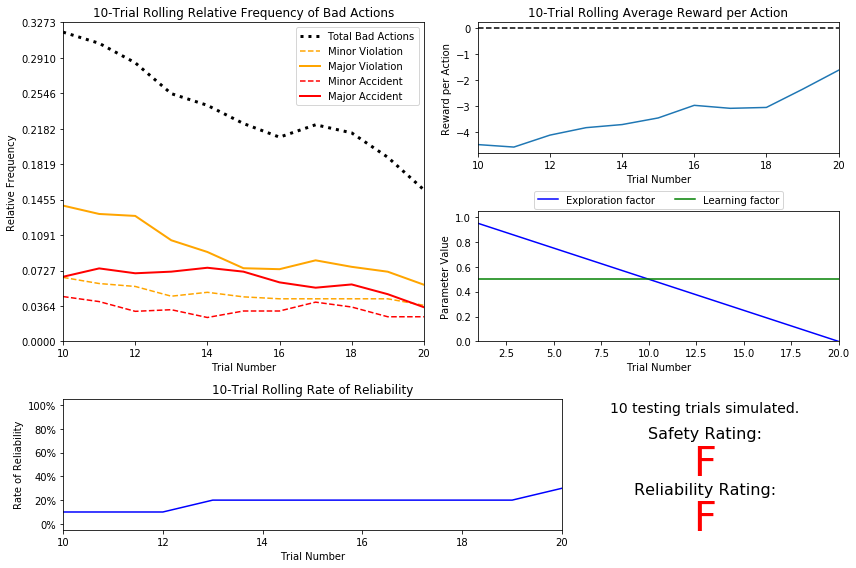

In [5]:
# self.epsilon = self.epsilon - 0.05
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**
- 基本驾驶代理程序和默认的Q-Learning代理程序的初始不良决策率相近，每个动作的平均奖励都始终为负。
- epsilon衰减率0.05，低于0.01时结束训练，程序进行了20次训练，与问题中所分析的300-400次相差甚远。在给定的容忍度0.01下应通过减小衰减率增加训练次数，线性函数衰减速度过快，考虑使用非线性衰减函数。
- 在参数面板中准确显示了epsilon值随试验次数线性下降。
- 从不良决策率和平均奖励曲线图可以看出，随着试验次数的增加，不良决策率总体下降，平均奖励增加。
- 评分相同，但可靠性的值与初始代理程序相比有一点提升，但仍然非常低。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

In [35]:
#%run smartcab\agent.py
#可以观察到可视化程序的各部分的功能

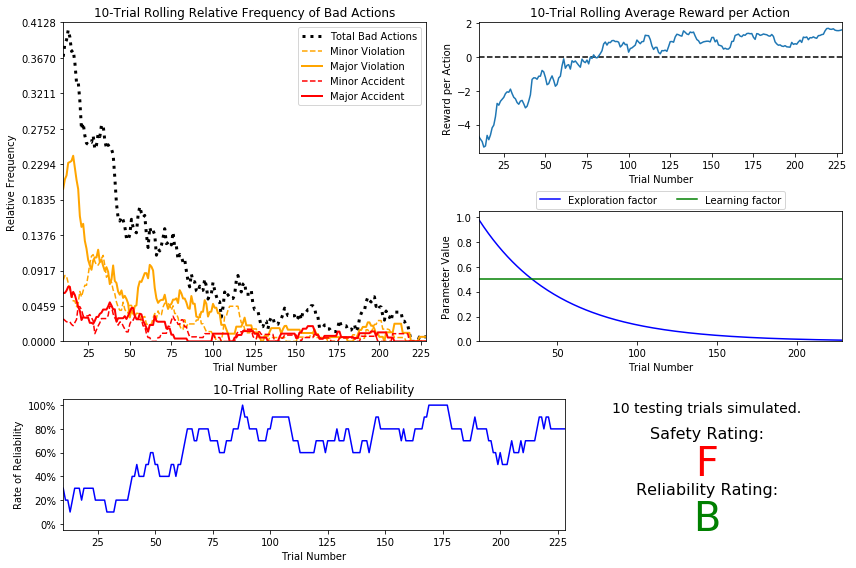

In [7]:
# epsilon = 0.98**t
# epsilon-tolerance = 0.05    alpha = 0.5
# 训练次数：250
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

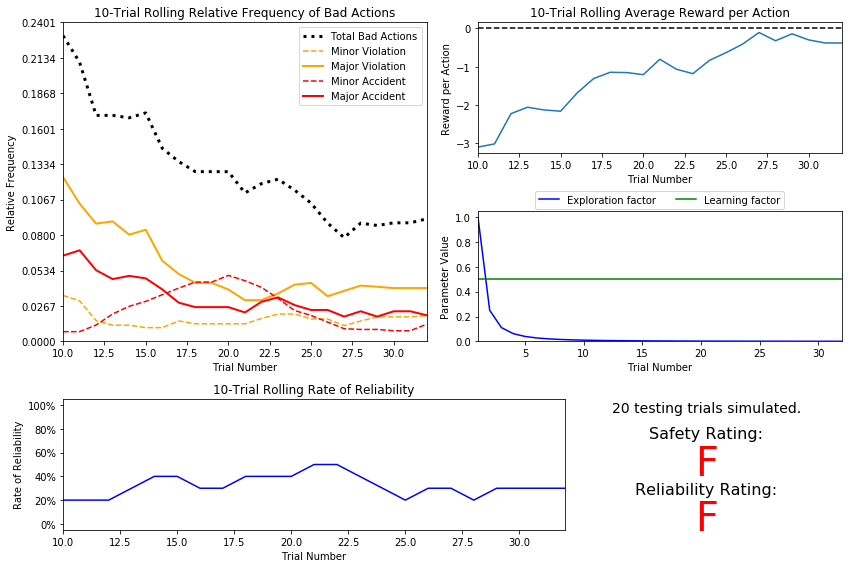

In [8]:
# epsilon =1.0/t**2
# epsilon-tolerance = 0.001    alpha = 0.5
# 训练次数：40
# F-F
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

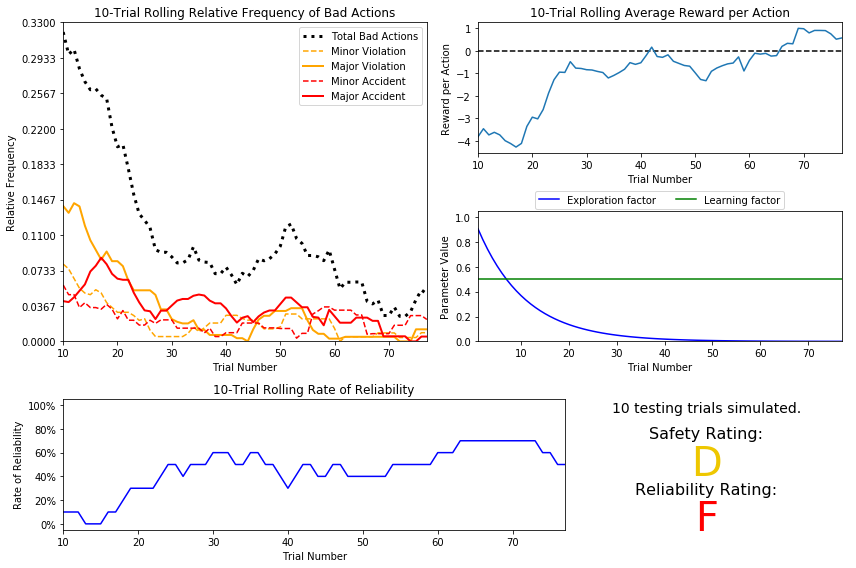

In [10]:
# epsilon = math.exp(-(0.1*t))
# epsilon-tolerance = 0.005    alpha = 0.5 
# 训练次数：70
vs.plot_trials('sim_improved-learning.csv')

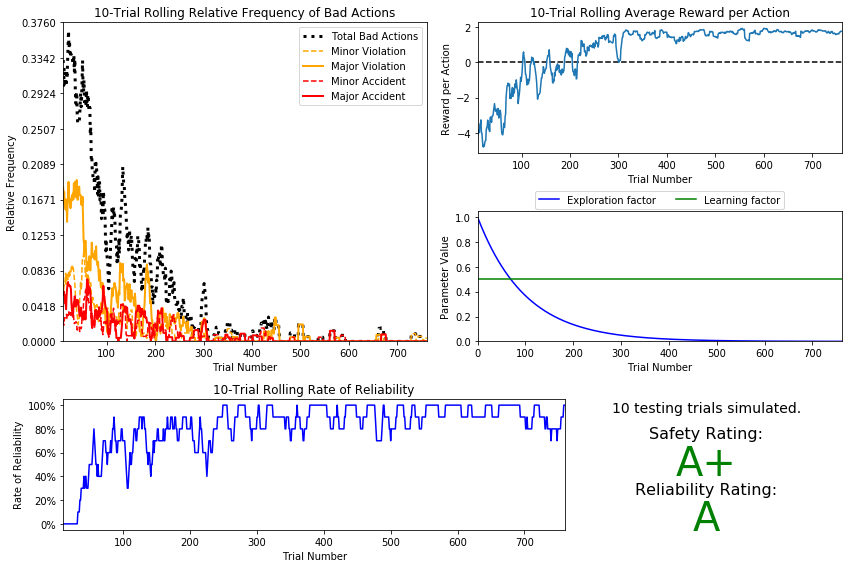

In [11]:
# epsilon = math.exp(-(0.01*t))
# epsilon-tolerance = 0.005    alpha = 0.5 
# 训练次数：750
vs.plot_trials('sim_improved-learning.csv')

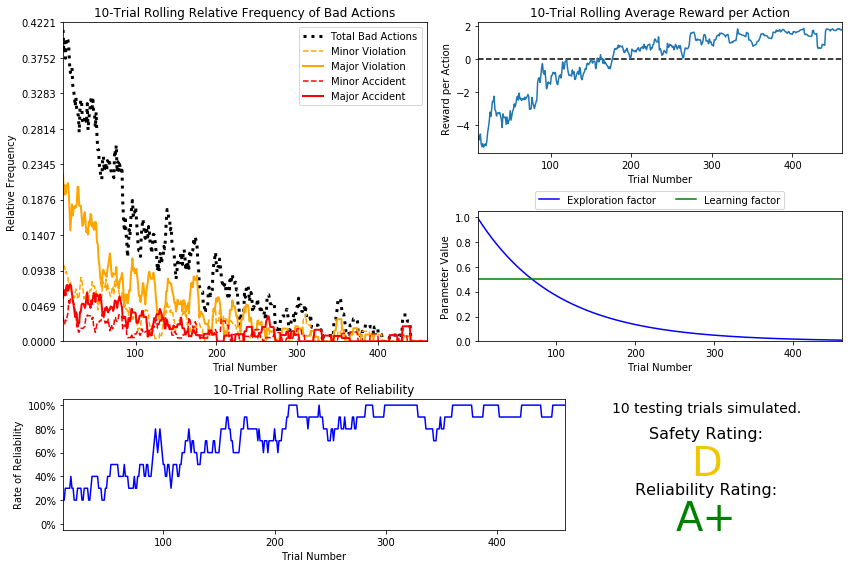

In [12]:
# epsilon = math.exp(-(0.01*t))
# epsilon-tolerance = 0.01    alpha = 0.5
# 训练次数：450
vs.plot_trials('sim_improved-learning.csv')

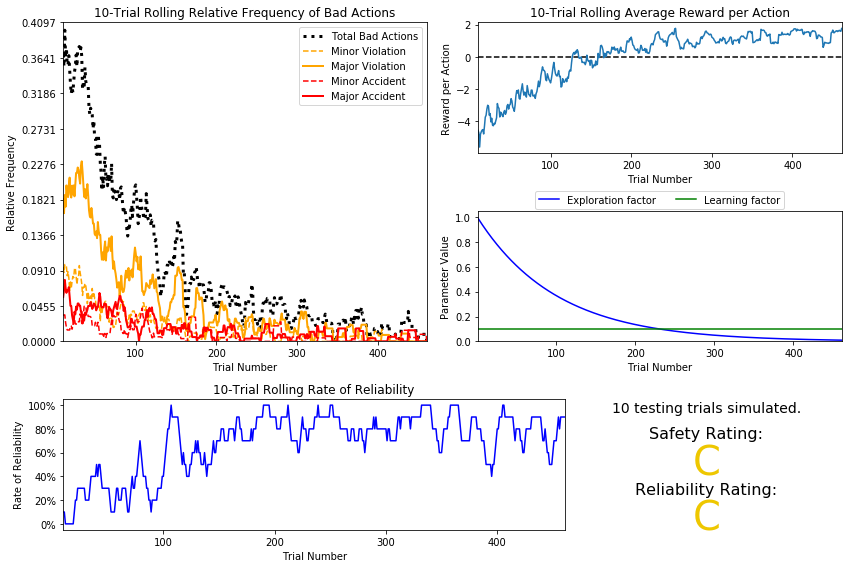

In [27]:
#epsilon = math.exp(-(0.01*t))
# epsilon-tolerance = 0.01    alpha = 0.1
# 训练次数：450
vs.plot_trials('sim_improved-learning.csv')

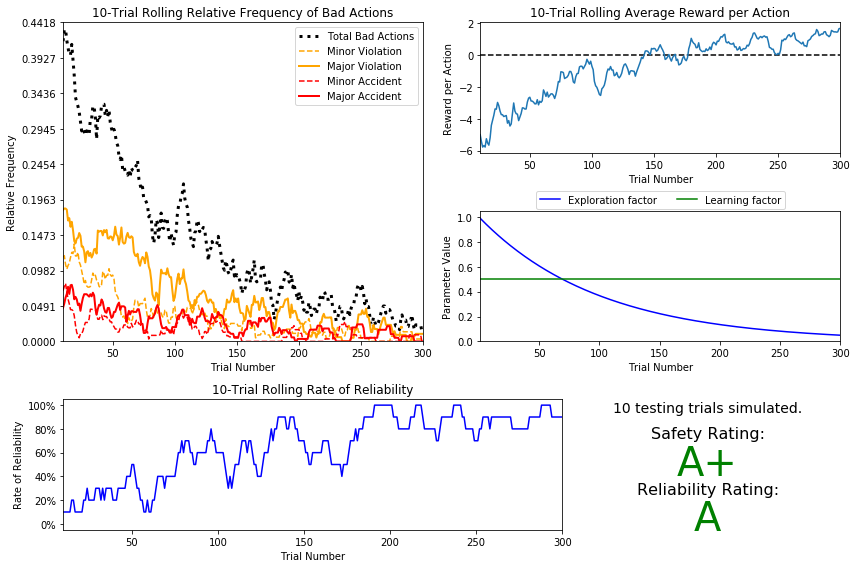

In [31]:
# epsilon = math.exp(-(0.01*t))
# epsilon-tolerance = 0.005    alpha = 0.5 
# 训练次数：300
vs.plot_trials('sim_improved-learning.csv')

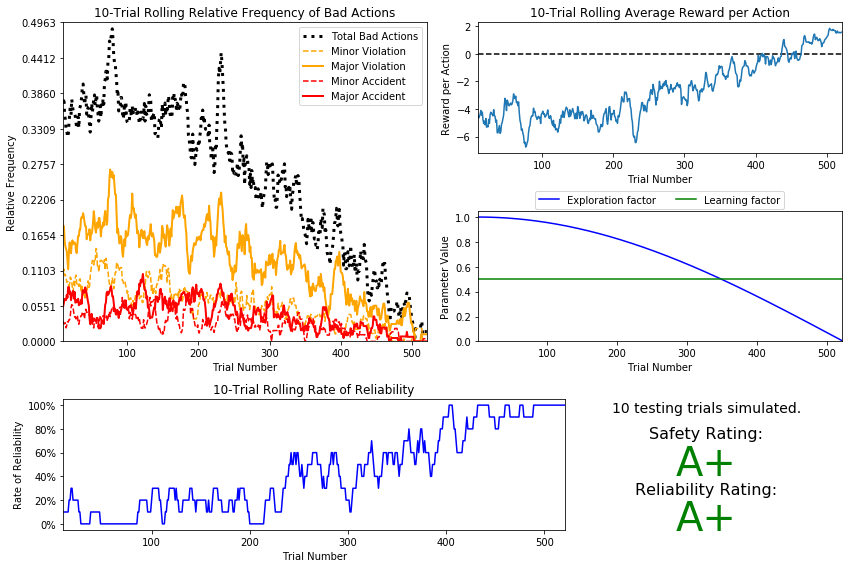

In [14]:
# epsilon = math.cos(0.003 * t)
# epsilon-tolerance = 0.01   alpha = 0.5 
# 训练次数：520
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

你在「问题7」中的分析过于简单。特别地，对epsilon-tolerance和alpha（学习率）值的分析还是处在比较浅显的水平，没有具体分析各个参数的含义，也没有给出其他实验结果。
请你阐述一下对 alpha、epsilon、n_tolerance 这几个参数的理解，并总结出它们的变化如何影响你小车的训练结果，如有其他实验结果也请展示。

**回答：**
- 依次使用了epsilon衰减函数如下：
$$ \epsilon = 0.98^{t} \hspace{50px}
\epsilon =1.0\textrm{ }/\textrm{ }t^{2} \hspace{50px}
\epsilon = e^{-0.01t}, \textrm{for } 0 < a < 1 \hspace{50px}
\epsilon = \cos(0.003t) $$
- 从多次的实验结果可以看出训练次数和学习率alpha对训练结果的影响是最大的，而训练次数是受到epsilon的衰减速率和n_tolerance共同影响的，若衰减过快例如函数1、2，导致训练次数仅有几十次，代理不能得到很好的训练。
- 后面结果较好的实验分别进行了300-500次训练。从log文件统计出500次训练后所有状态都获得了遍历，但其中354个Q值仍为0，约为所有Q值的1/4，所以虽然一个state需要遍历4次可以充分收敛，但实际上遍历3次就可以保证决策结果基本正确，或者说3/4的state被充分遍历时可以保证行驶的安全性可靠性。
- 函数3、4衰减较缓慢，保证了有足够多训练时间中epsilon的值较大，模型对状态空间的Q值探索充分，对函数3尝试通过改变n_tolerance来改变训练次数，可以看到训练750次的结果为（A+，A）训练450次的结果为（D，A+）可见训练次数对结果的影响还是很大的。对比使用函数3，n_tolerance=0.01，alpha分别为0.5和0.1的结果，训练次数相同均为450次，学习率0.5的结果（D，A+）学习率0.1的结果（C，C），综合来看学习率较大时训练结果较好，但可以看出学习率高、模型受到“当前奖励”的影响较大，对过去学习的“成功经验”采纳较少，可以更快到达终点，但安全性反而下降。但通过n_tolerance=0.005、alpha=0.5的结果为（A+，A）说明该问题可以通过增加训练次数来修正。
- 最后使用函数4时达到了最佳效果，由于epsilon在训练前期保持在一个较大的值，使得代理在较少的训练次数（520次）中获得了最好的训练结果。通过不断调整衰减函数、n_tolerance和学习率alpha，可以看到训练效果不断提升。默认的学习器并不能从动作的奖励中获得反馈，从经验中学习，而使用了Q-learning学习器能够综合考虑过去的“成功经验”和“当前奖励”做出决策，并以epsilon的概率去搜索更多未知策略，避免陷入局部最优，是一个智能的学习程序。
- 是的，在该模型所定义的环境中驾驶代理学到最好的策略，但仅限于该环境下。
- 对于一个小程序，还算满意，但仍有很多改进空间。这只是一个十分简化的智能车学习器，真实环境中需要考虑的影响因素远远多于这些，交通灯信号更复杂、交通法规中的各种优先规则以及路面指示线指示牌都是需要包含在模型中的参数。如果真正想要上路行驶，那么对可靠性的要求也十分严苛，应尽量达到100%。

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** 

状态由5个特征描述，分别为(waypoint, light, left, right, oncoming)

| 序号 	| 状态 	| Q值 	| 策略 	|
|:-----:	|:-----:	|:------:	|:-----------:	|
| 1	|('left', 'red', 'right', 'left', 'forward')|forward : 0.00 right : 0.66 None : 0.00 left : 0.00|right|
| 2	|('left', 'red', None, 'right', 'left')|forward : -7.43 right : 1.10 None : 2.07 left : -7.22|None|
| 3	|('left', 'green', 'left', 'forward', None)| forward : 0.26 right : 0.90 None : -4.83 left : 1.98| left|
| 4	|('forward', 'green', 'forward', 'right', None)| forward : 1.53 right : 0.68 None : -4.38 left : 0.00| forward |
| 5	|('forward', 'red', 'left', 'left', 'left')| forward : 0.00 right : 0.57 None : 2.01 left : -4.55| right|


- 情况1：左转遇红灯，代理选择右转，是次优策略；不会出现事故，但实际上与预期方向相反方向行驶，远离了目的地；

- 情况2：左转遇红灯，代理选择不动，是最优策略；

- 情况3：左转遇绿灯，代理选择左转，是最优策略；
   
- 情况4：直行遇绿灯，代理选择直行，是最优策略；同时可以看到此时若不动会有较大的惩罚，符合常识；

- 情况5：直行遇红灯，代理选择右转，是次优策略；不会出现事故，但实际上远离了目的地，降低可靠性；

从情况1和5可以看出，代理在遇到红灯时有绕路而不停车的倾向，这是不符合人类常识的，需要调整奖励函数。绝大部分策略都是符合人类驾车时会采取的最优策略，代理程序的训练结果还是不错的。


-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。